# Optimizacion Industrial con Computacion Evolutiva
<b> Diplomatura de Especialización en Desarrollo de Aplicaciones con Inteligencia Artificial</b>

Dr. Edwin Villanueva (ervillanueva@pucp.edu.pe)


### 1.Carga de Librerias

In [85]:
!pip install tabulate
import sys
import time
import numpy as np
import random
from copy import deepcopy
import matplotlib.pyplot as plt

###2.Define la estructura de un individuo en el AG con sus operadores genéticos

Definincion de clase `Individual` para representar a un individuo siendo el objetivo tomar como entrada un cromosoma (lista de diccionarios), realiza cruzamientos para combinar cromosomas y genera nuevos individuos, y aplica mutaciones para alterar aleatoriamente ciertos genes. Como salida, produce nuevos individuos con cromosomas modificados.

In [86]:
class Individual:

    def __init__(self, chromosome):  # el constructor recibe un cromosoma
       # self.chromosome = chromosome[:]
       self.chromosome = chromosome
       self.fitness = -1  # -1 indica que el individuo no ha sido evaluado


    def crossover_onepoint(self, other):
        "Retorna dos nuevos individuos del cruzamiento de un punto entre individuos self y other "
        c = random.randrange(len(self.chromosome))
        ind1 = Individual(self.chromosome[:c] + other.chromosome[c:])
        ind2 = Individual(other.chromosome[:c] + self.chromosome[c:])
        return [ind1, ind2]

    def crossover_uniform(self, other):
        chromosome1 = []
        chromosome2 = []
        "Retorna dos nuevos individuos del cruzamiento uniforme entre self y other "
        for i in range(len(self.chromosome)):
            if random.uniform(0, 1) < 0.5:
                chromosome1.append(self.chromosome[i])
                chromosome2.append(other.chromosome[i])
            else:
                chromosome1.append(other.chromosome[i])
                chromosome2.append(self.chromosome[i])
        ind1 = Individual(chromosome1)
        ind2 = Individual(chromosome2)
        return [ind1, ind2]

    def mutation_flip(self):
        "Cambia un gen aleatorio de un individuo que tiene un cromosoma como lista de diccionarios."
        new_chromosome = deepcopy(self.chromosome)
        mutGene = random.randrange(0, len(new_chromosome))   # escoge un gen para mutar

        # Cambia uno de los atributos del gen (por ejemplo, el horario o el aula)
#        gen = new_chromosome[mutGene]
#        if random.choice([True, False]):
#            # Cambiar el horario asignado a otro horario
#            nuevo_horario = random.choice(list(horarios.keys()))
#            gen['horario'] = nuevo_horario
#        else:
#            # Cambiar el aula asignada a otra aula
#            nuevo_aula = random.choice(list(aulas.keys()))
#            gen['aula'] = nuevo_aula
#
#        return Individual(new_chromosome)

    def mutation_flip(self):
        "Cambia un gen aleatorio de un individuo que tiene un cromosoma como lista de diccionarios."
        new_chromosome = deepcopy(self.chromosome)
        mutGene = random.randrange(0, len(new_chromosome))   # escoge un gen para mutar

        # Cambia uno de los atributos del gen (por ejemplo, el horario, el aula o el profesor)
        gen = new_chromosome[mutGene]
        atributo_a_mutar = random.choice(['horario', 'aula', 'profesor'])

        if atributo_a_mutar == 'horario':
            nuevo_horario = random.choice(list(horarios.keys()))
            gen['horario'] = nuevo_horario
        elif atributo_a_mutar == 'aula':
            nuevo_aula = random.choice(list(aulas.keys()))
            gen['aula'] = nuevo_aula
        elif atributo_a_mutar == 'profesor':
            nuevo_profesor = random.choice(list(profesores.keys()))
            gen['profesor'] = nuevo_profesor

        return Individual(new_chromosome)


#    def mutation_multiflip(self):
#        """
#        Cambia los alelos de un conjunto de genes escogidos aleatoriamente (hasta un maximo de 50% de genes).
#        """
#        new_chromosome = deepcopy(self.chromosome)
#         ## ESCRIBIR AQUI SU CODIGO
#        num_genes_to_mutate = random.randint(1, len(new_chromosome) // 2)
#        numx_mutate = random.sample(range(len(new_chromosome)), num_genes_to_mutate)##

#       for genX in numx_mutate:
#            if new_chromosome[genX] == 0:
#               new_chromosome[genX] = 1
#            else: 0
#
#
#        return Individual(new_chromosome)

    def mutation_multiflip(self):
        """
        Cambia los alelos de un conjunto de genes escogidos aleatoriamente (hasta un máximo de 50% de genes).
        """
        new_chromosome = deepcopy(self.chromosome)
        num_genes_to_mutate = random.randint(1, len(new_chromosome) // 2)
        genes_to_mutate = random.sample(range(len(new_chromosome)), num_genes_to_mutate)

        for genX in genes_to_mutate:
            # Similar al método mutation_flip, cambia los atributos del gen
            gen = new_chromosome[genX]
            atributo_a_mutar = random.choice(['horario', 'aula', 'profesor'])

            if atributo_a_mutar == 'horario':
                nuevo_horario = random.choice(list(horarios.keys()))
                gen['horario'] = nuevo_horario
            elif atributo_a_mutar == 'aula':
                nuevo_aula = random.choice(list(aulas.keys()))
                gen['aula'] = nuevo_aula
            elif atributo_a_mutar == 'profesor':
                nuevo_profesor = random.choice(list(profesores.keys()))
                gen['profesor'] = nuevo_profesor

        return Individual(new_chromosome)


###3.Estructura de datos en diccionarios
El código estructura información académica en cuatro diccionarios: `horarios` asigna franjas horarias, `aulas` define la capacidad de cada aula, `profesores` mapea códigos de profesores con sus nombres y horarios preferidos, y `cursos` asocia cursos con su nombre, número de alumnos y profesores asignados, facilitando la programación académica.

In [87]:
import random

# Datos proporcionados
horarios = {
    'H001': 'L-Mi-V 09:00 – 10:00',
    'H002': 'L-Mi-V 10:00 – 11:00',
    'H003': 'Ma-J 09:00 – 10:30',
    'H004': 'Ma-J 10:30 – 12:00'
}

aulas = {
    'A001': 45,
    'A002': 35,
    'A003': 25
}

profesores = {
    'P001': {'nombre': 'Dr. Edwin Villanueva', 'preferido': None},
    'P002': {'nombre': 'Mg. Layla Hirsh', 'preferido': 'H001'},
    'P003': {'nombre': 'Dr. Manuel Tupia', 'preferido': None},
    'P004': {'nombre': 'Mg. Cesar Aguilera', 'preferido': 'H002'}
}

cursos = {
    'C001': {'nombre': 'Fundamentos de programación', 'alumnos': 45, 'profesores': ['P001', 'P002', 'P003', 'P004']},
    'C002': {'nombre': 'Bases de Datos', 'alumnos': 45, 'profesores': ['P004']},
    'C003': {'nombre': 'Algoritmia', 'alumnos': 35, 'profesores': ['P002', 'P003']},
    'C004': {'nombre': 'Sistemas de información', 'alumnos': 30, 'profesores': ['P003', 'P004']},
    'C005': {'nombre': 'Sistemas de Información 2', 'alumnos': 30, 'profesores': ['P003', 'P004']},
    'C006': {'nombre': 'Machine Learning', 'alumnos': 25, 'profesores': ['P001', 'P002']},
    'C007': {'nombre': 'Deep Learning', 'alumnos': 20, 'profesores': ['P001']}
}


###4.Funcion para obtener el fitness de un cromosoma

La función `get_fitness` recibe un individuo (lista de genes). Evalúa la calidad de sus asignaciones académicas (aulas, horarios, profesores) considerando restricciones como disponibilidad, capacidad y duplicación de cursos. Suma penalizaciones y recompensas para calcular el fitness total, que refleja cuán óptima es la solución propuesta. Finalmente, retorna el valor de fitness total.

In [88]:
def get_fitness(individuo, verbose=False):
    fitness_total = 0
    report = []

    # Diccionarios para rastrear asignaciones y detectar conflictos
    asignaciones_aula = {}
    asignaciones_profesor = {}
    cursos_dictados = set()

    if verbose:
        print("\nEvaluando individuo:")

    for gen in individuo:
        curso = gen['curso']
        horario = gen['horario']
        aula = gen['aula']
        profesor = gen['profesor']
        num_alumnos = cursos[curso]['alumnos']
        capacidad_aula = aulas[aula]

        print(f"\nEvaluando gen: Curso={curso}, Horario={horario}, Aula={aula}, Profesor={profesor}")
        print(f"Fitness inicial: {fitness_total}")

        # 1. Restricción de Aula en el tiempo
        if (aula, horario) in asignaciones_aula:
            penalizacion = -101
            fitness_total += penalizacion
            print(f"Penalización por aula ocupada: {penalizacion}, Fitness después: {fitness_total}")
        else:
            recompensa = 51
            fitness_total += recompensa
            asignaciones_aula[(aula, horario)] = curso
            print(f"Recompensa por aula asignada: {recompensa}, Fitness después: {fitness_total}")

        # 2. Restricción de Profesor en el tiempo
        if (profesor, horario) in asignaciones_profesor:
            penalizacion = -102
            fitness_total += penalizacion
            print(f"Penalización por profesor ocupado: {penalizacion}, Fitness después: {fitness_total}")
        else:
            recompensa = 52
            fitness_total += recompensa
            asignaciones_profesor[(profesor, horario)] = curso
            print(f"Recompensa por profesor asignado: {recompensa}, Fitness después: {fitness_total}")

        # 3. Restricción de Capacidad de aula vs. alumnos inscritos
        if num_alumnos > capacidad_aula:
            penalizacion = -103
            fitness_total += penalizacion
            print(f"Penalización por exceso de capacidad: {penalizacion}, Fitness después: {fitness_total}")
        else:
            recompensa = 53
            fitness_total += recompensa
            print(f"Recompensa por capacidad suficiente: {recompensa}, Fitness después: {fitness_total}")

        # 4. Restricción de Duplicación
        if curso in cursos_dictados:
            penalizacion = -10000  # Penalización por curso duplicado
            fitness_total += penalizacion
            print(f"Penalización por curso duplicado: {penalizacion}, Fitness después: {fitness_total}")
        else:
            cursos_dictados.add(curso)
            recompensa = 107  # Premio por curso dictado una sola vez
            fitness_total += recompensa
            print(f"Recompensa por curso único: {recompensa}, Fitness después: {fitness_total}")

    if verbose:
        print(tabulate(report, headers=["Curso", "Descripción", "Valor de Fitness", "Fitness Acumulado"], tablefmt="grid"))

    print(f"Fitness total final para este individuo: {fitness_total}")
    return fitness_total


###5.Funcion para evaluar una población de individuos
La función evaluate_population trabaja en "lotes", evaluando en bloque a todos los individuos de la población que aún no han sido evaluados, y actualizando sus valores de fitness. De esta manera, asegura que cada individuo tenga un fitness asignado antes de pasar a la siguiente generación en el algoritmo genético.La evaluación en "lotes de individuos" permite comparar individuos consistentemente, optimiza el procesamiento, y simplifica el ciclo evolutivo en algoritmos genéticos, asegurando eficiencia y coherencia en cada generación.

In [89]:
### Para asegurarte de que se muestren los datos de todos los 10 individuos en la única generación, debes ajustar el código de la función evaluate_population para que imprima los detalles de cada individuo.

def evaluate_population(population, generation):

#   Evalúa una población de individuos con la función get_fitness
    popsize = len(population)
    for i in range(popsize):
        if population[i].fitness == -1:  # Evalúa solo si el individuo no está evaluado
            # Imprime detalles para todos los individuos
            print(f"\nEvaluando individuo {i+1}/{popsize} en la generación {generation}:")
            population[i].fitness = get_fitness(population[i].chromosome, verbose=True)

###6.Funciones para generar aleatoriamente individuos y poblacion
Este código genera una población inicial para un algoritmo genético. generar_individuo_variedad crea individuos asignando horarios, aulas y profesores a cursos, evitando repeticiones. init_population utiliza esta función para crear múltiples individuos, formando una población lista para ser evaluada en el algoritmo. La salida es una lista de individuos.

In [90]:
def generar_individuo_variedad(cursos, horarios, aulas, profesores):
    individuo = []
    usados_horarios = set()
    usados_aulas = set()
    usados_profesores = set()

    for curso_id, curso_info in cursos.items():
        # Asegurar que se usen horarios, aulas y profesores diferentes al máximo
        horario_asignado = random.choice([h for h in list(horarios.keys()) if h not in usados_horarios] or list(horarios.keys()))
        aula_asignada = random.choice([a for a in list(aulas.keys()) if a not in usados_aulas] or list(aulas.keys()))
        profesor_asignado = random.choice([p for p in curso_info['profesores'] if p not in usados_profesores] or curso_info['profesores'])

        # Añadir a los sets usados
        usados_horarios.add(horario_asignado)
        usados_aulas.add(aula_asignada)
        usados_profesores.add(profesor_asignado)

        # Crear el gen con la asignación
        gen = {
            'curso': curso_id,
            'horario': horario_asignado,
            'aula': aula_asignada,
            'profesor': profesor_asignado
        }

        individuo.append(gen)

    return individuo

In [91]:
#def init_population(popsize, chromosome_size, zeroes=False):

def init_population(tamano_poblacion, cursos, horarios, aulas, profesores):
    population = []
    for _ in range(tamano_poblacion):
        individuo = generar_individuo_variedad(cursos, horarios, aulas, profesores)  # Usar la nueva función
        population.append(Individual(individuo))

    return population

###7.Operadores de seleccion de padres

#### Seleccion por Ruleta
Este código selecciona dos padres de una población usando la técnica de selección por ruleta, que favorece la elección de individuos con mayor fitness, pero evita seleccionar el mismo individuo dos veces. La salida son dos individuos que se utilizarán en el cruce genético.

In [92]:
def select_parents_roulette(population):
    popsize = len(population)

    # Escoje el primer padre
    sumfitness = sum([indiv.fitness for indiv in population])  # suma total del fitness de la poblacion
    pickfitness = random.uniform(0, sumfitness)   # escoge un numero aleatorio entre 0 y sumfitness
    cumfitness = 0     # fitness acumulado
    for i in range(popsize):
        cumfitness += population[i].fitness
        if cumfitness > pickfitness:
            iParent1 = i
            break

    # Escoje el segundo padre, desconsiderando el primer padre
    sumfitness = sumfitness - population[iParent1].fitness # retira el fitness del padre ya escogido
    pickfitness = random.uniform(0, sumfitness)   # escoge un numero aleatorio entre 0 y sumfitness
    cumfitness = 0     # fitness acumulado
    for i in range(popsize):
        if i == iParent1: continue   # si es el primer padre
        cumfitness += population[i].fitness
        if cumfitness > pickfitness:
            iParent2 = i
            break
    return (population[iParent1], population[iParent2])

#### Seleccion por Torneo
Este código selecciona dos padres de una población utilizando la técnica de "torneo", donde en cada torneo un grupo de individuos compite y el de mayor fitness es seleccionado. El proceso se repite dos veces, asegurando que no se selecciona al mismo individuo como ambos padres. La salida son dos individuos para su uso en el cruce genético.

In [93]:
def select_parents_tournament(population, tournament_size):
    # Escoje el primer padre
    list_indiv=[]
    x1 = np.random.permutation(len(population) )
    y1= x1[0:tournament_size]
    for i in range(tournament_size):
        list_indiv.append(population[y1[i]].fitness)

    iParent1=np.argmax(list_indiv)

    # Escoje el segundo padre, desconsiderando el primer padre
    x2 = np.delete(x1, iParent1)
    x2 = np.random.permutation(x2)
    list_indiv=[]
    y2= x2[0:tournament_size]
    for i in range(tournament_size):
        list_indiv.append(population[y2[i]].fitness)
    iParent2=np.argmax(list_indiv)

    return (population[x1[iParent1]],population[x2[iParent2]])

###8.Operadores de Seleccion de sobrevivientes
Función de selección de la poblacion para la sgte generación por ranking
Selecciona la población siguiente ranqueando los individuos de la poblacion actual (population) y la poblacion descendencia (offspring_population) y escogiendo los mejores individuos (survivors). En resumen, este código selecciona a los mejores individuos para la siguiente generación en un algoritmo genético mediante la técnica de selección por ranking. Combina la población original y los descendientes, y elige a los individuos con mayor fitness para formar la nueva población, asegurando así la supervivencia de los más aptos (survivors).


In [94]:
def select_survivors_ranking(population, offspring_population, numsurvivors):
    next_population = []
    population.extend(offspring_population) # une las dos poblaciones
    isurvivors = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:numsurvivors]
    for i in range(numsurvivors):
        next_population.append(population[isurvivors[i]])
    return next_population

###9.Algoritmo Genetico para encontrar soluciones al problema
Este código implementa un algoritmo genético para optimizar la asignación de recursos académicos, como cursos, aulas, horarios y profesores. El flujo principal se encuentra en la función `genetic_algorithm`, que comienza evaluando una población inicial y luego, a lo largo de varias generaciones, selecciona padres utilizando métodos como ruleta o torneo. Estos padres generan descendientes mediante cruces (one-point o uniforme), y se aplican mutaciones según una probabilidad dada. Los descendientes se evalúan y los mejores sobreviven para formar la próxima generación.

El algoritmo incluye una condición de parada basada en un umbral de fitness (`STOP_THRESHOLD`) y un contador de repeticiones (`STOP_REPEAT`). Si el mejor fitness se repite durante **3 generaciones consecutivas** sin mejora, el algoritmo se detiene automáticamente. Esto evita que el algoritmo continúe ejecutándose innecesariamente.

Además, la función `mostrar_cronograma_tabla` imprime la asignación de un individuo en formato tabular, y `imprimir_mejor_individuo` muestra el mejor individuo de la última generación junto con su valor de fitness. Finalmente, el algoritmo retorna el mejor individuo y un registro del fitness a lo largo de las generaciones, permitiendo visualizar la evolución hacia una solución óptima.

In [95]:
import pandas as pd

def mostrar_cronograma_tabla(individuo):
    # Crear una lista para almacenar los datos de cada curso
    data = []

    # Recorrer el individuo y extraer la información relevante
    for gen in individuo:
        curso_id = gen['curso']
        curso_nombre = cursos[curso_id]['nombre']
        alumnos = cursos[curso_id]['alumnos']
        horario = horarios[gen['horario']]
        aula_id = gen['aula']
        capacidad_aula = aulas[aula_id]
        profesor_id = gen['profesor']
        horario_id = gen['horario']

        profesor_nombre = profesores[gen['profesor']]['nombre']

        # Añadir los datos como una fila en la lista
        data.append([curso_id, curso_nombre, alumnos, aula_id, capacidad_aula, profesor_id, profesor_nombre, horario_id, horario])

    # Crear un DataFrame de pandas con los datos
    df = pd.DataFrame(data, columns=['clase_id', 'curso', 'cantidad_alumnos', 'aula_id', 'capacidad', 'profesor_id', 'profesor', 'horario_id', 'horario'])

    # Imprimir la tabla
    print(df.to_markdown(tablefmt="grid"))


In [96]:
def imprimir_mejor_individuo(mejor_individuo, fitness):
    print("Mejor individuo en la última generación = ")
    for gen in mejor_individuo:
        print(gen)
    print(f"(fitness = {fitness})")

In [97]:
def genetic_algorithm(poblacion_inicial, ngen=100, pmut=0.1,
                      crossover="onepoint", mutation="flip",
                      selection_parents_method="roulette",
                      selection_survivors_method="ranking"):

    STOP_THRESHOLD = 1841  # Umbral de fitness para la condición de parada
    STOP_REPEAT = 3  # Número de generaciones que se permite repetir el fitness
    repeat_count = 0  # Contador de repeticiones del mejor fitness
    last_fitness = None  # Almacena el mejor fitness de la generación anterior

    population = deepcopy(poblacion_inicial)  # Copia la población inicial en una nueva variable para no alterar la original
    popsize = len(population)
    evaluate_population(population, generation=0)  # Evalúa la población inicial en la generación 0
    ibest = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:1]  # Mejor individuo
    bestfitness = [population[ibest[0]].fitness]  # Fitness del mejor individuo
    print("Población inicial, best_fitness = {}".format(population[ibest[0]].fitness))

    for g in range(1, ngen+1):  # Comienza desde la generación 1 hasta ngen
        mating_pool = []
        for i in range(int(popsize / 2)):
            if selection_parents_method == "roulette":
                mating_pool.append(select_parents_roulette(population))
            elif selection_parents_method == "tournament":
                mating_pool.append(select_parents_tournament(population, 3))
            else:
                raise NotImplementedError

        offspring_population = []
        for i in range(len(mating_pool)):
            if crossover == "onepoint":
                offspring_population.extend(mating_pool[i][0].crossover_onepoint(mating_pool[i][1]))
            elif crossover == "uniform":
                offspring_population.extend(mating_pool[i][0].crossover_uniform(mating_pool[i][1]))
            else:
                raise NotImplementedError

        for i in range(len(offspring_population)):
            if random.uniform(0, 1) < pmut:
                if mutation == "flip":
                    offspring_population[i] = offspring_population[i].mutation_flip()
                elif mutation == "multiflip":
                    offspring_population[i] = offspring_population[i].mutation_multiflip()
                elif mutation == "inversion":
                    offspring_population[i] = offspring_population[i].mutation_inversion()
                else:
                    raise NotImplementedError

        evaluate_population(offspring_population, generation=g)

        if selection_survivors_method == "ranking":
            population = select_survivors_ranking(population, offspring_population, popsize)
        else:
            raise NotImplementedError

        ibest = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:1]
        current_fitness = population[ibest[0]].fitness
        bestfitness.append(current_fitness)

        # Verifica la condición de parada
        if current_fitness == STOP_THRESHOLD:
            if last_fitness == current_fitness:
                repeat_count += 1
            else:
                repeat_count = 1  # Resetea el contador si el fitness cambia

            if repeat_count >= STOP_REPEAT:
                print(f"Fitness de {STOP_THRESHOLD} repetido en las últimas {STOP_REPEAT} generaciones. Deteniendo.")
                break

        last_fitness = current_fitness

        if g % 10 == 0:  # Muestra resultados cada 10 generaciones
            print("Generación {}, Mejor fitness = {}".format(g, current_fitness))

    imprimir_mejor_individuo(population[ibest[0]].chromosome, population[ibest[0]].fitness)
    return population[ibest[0]], bestfitness


###10.Algoritmo Genetico en accion
Este código configura y ejecuta un algoritmo genético para optimizar la asignación de recursos académicos, seguido por la visualización de los resultados obtenidos.

Hiperparámetros del Algoritmo Genético:

tamano_poblacion: Establece el número de individuos en la población inicial (336).
GENERATIONS: Define el número de generaciones a lo largo de las cuales el algoritmo evoluciona (100 generaciones).
PMUT: Tasa de mutación, que en este caso es 0.0, indicando que no habrá mutación.
Inicialización de la Población:

poblacion_inicial: Se genera una población inicial de 336 individuos utilizando la función init_population. Cada individuo representa una posible solución al problema de asignación académica.
Evolución con el Algoritmo Genético:

genetic_algorithm: Ejecuta el algoritmo genético utilizando la población inicial. Se especifican parámetros como:
crossover: Tipo de cruce utilizado ('uniform').
mutation: Tipo de mutación aplicada ('multiflip').
selection_parents_method: Método de selección de padres ('roulette').
selection_survivors_method: Método de selección de sobrevivientes ('ranking').
Salida: El algoritmo retorna el mejor individuo (best_ind) y una lista del mejor fitness a lo largo de las generaciones (bestfitness).
Visualización del Mejor Individuo:

mostrar_cronograma_tabla: Imprime en formato tabular la asignación de horarios, aulas y profesores del mejor individuo encontrado por el algoritmo.
Visualización de la Evolución del Fitness:

plt.plot(bestfitness): Grafica la evolución del mejor fitness a lo largo de las 100 generaciones, mostrando cómo el algoritmo mejora progresivamente la solución.
Resumen:
Este código configura y ejecuta un algoritmo genético para optimizar la asignación de recursos académicos. Genera una población inicial, la evoluciona a través de generaciones usando cruce uniforme y mutación multiflip, y selecciona a los individuos más aptos usando la selección por ruleta y ranking. Finalmente, muestra la mejor solución en una tabla y grafica la evolución del fitness a lo largo de las generaciones.

Streaming output truncated to the last 5000 lines.
Recompensa por profesor asignado: 52, Fitness después: 210
Recompensa por capacidad suficiente: 53, Fitness después: 263
Recompensa por curso único: 107, Fitness después: 370

Evaluando gen: Curso=C003, Horario=H001, Aula=A003, Profesor=P003
Fitness inicial: 370
Recompensa por aula asignada: 51, Fitness después: 421
Recompensa por profesor asignado: 52, Fitness después: 473
Penalización por exceso de capacidad: -103, Fitness después: 370
Recompensa por curso único: 107, Fitness después: 477

Evaluando gen: Curso=C004, Horario=H004, Aula=A001, Profesor=P003
Fitness inicial: 477
Recompensa por aula asignada: 51, Fitness después: 528
Recompensa por profesor asignado: 52, Fitness después: 580
Recompensa por capacidad suficiente: 53, Fitness después: 633
Recompensa por curso único: 107, Fitness después: 740

Evaluando gen: Curso=C005, Horario=H002, Aula=A003, Profesor=P003
Fitness inicial: 740
Recompensa por aula asignada: 51, Fitness despu

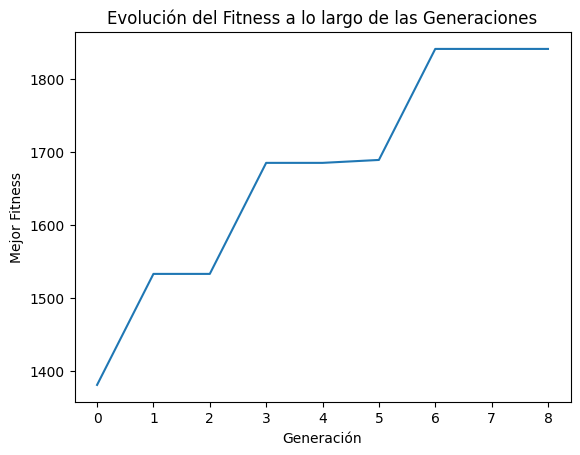

In [98]:
from tabulate import tabulate


# Hiperparámetros del algoritmo genético
tamano_poblacion = 50  # número de individuos
GENERATIONS = 100  # número de generaciones
PMUT = 0.05  # tasa de mutación

# Inicializa una población inicial de forma aleatoria
poblacion_inicial = init_population(tamano_poblacion, cursos, horarios, aulas, profesores)

# Evoluciona la población con el algoritmo genético (cruzamiento 'uniforme', mutación 'flip')
best_ind, bestfitness = genetic_algorithm(poblacion_inicial, GENERATIONS, PMUT,
                                          crossover="onepoint", mutation="multiflip",
                                          selection_parents_method='roulette',
                                          selection_survivors_method='ranking')

mostrar_cronograma_tabla(best_ind.chromosome)


# Muestra la evolución del mejor fitness en la pantalla
plt.plot(bestfitness)
plt.xlabel('Generación')
plt.ylabel('Mejor Fitness')
plt.title('Evolución del Fitness a lo largo de las Generaciones')
plt.show()